In [1]:
from nmon import *

 /Users/nikolaygusarov/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py: 34

nmon [-2.18659892e-02  7.19676128e-01  7.41516201e-01  1.25008992e+03
  1.25008994e+03  1.25026992e+03]


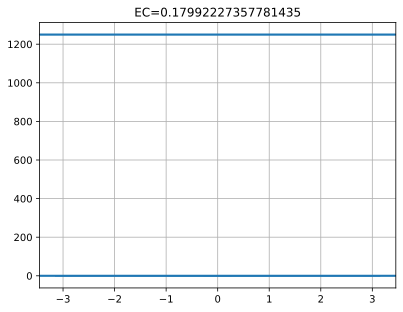

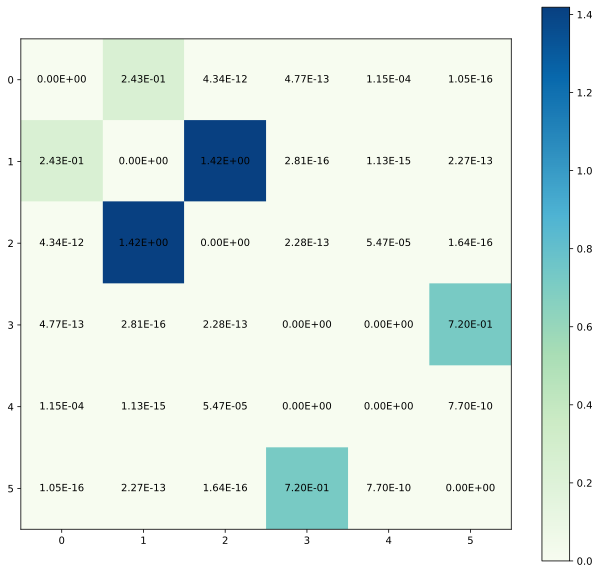

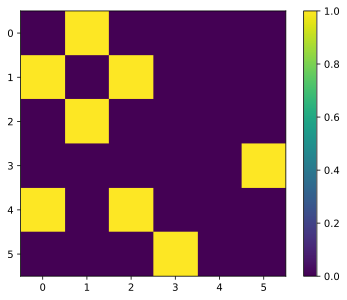

[0.7415421169512317, 0.02184007290611356, 1249.3484190395602, 0.17998271315605052]
[-2.18659892e-02  7.19676128e-01  7.41516201e-01  1.25008992e+03
  1.25008994e+03  1.25026992e+03]
-0.9705477647097017


In [5]:
N = 1
M = 2
EC_shunt = 0.18 * 1

EJ_EC = 1

nmon = Nmon(N=N, M=M, EJN=EC_shunt*EJ_EC*1, EJM=EC_shunt*EJ_EC*1, EC_shunt=EC_shunt)
nmon.flag_calc_transitions = True
nmon.hamiltonian_calc(flux=0.0, ng=[0.0, 0.0], num_levels=6, make_plot=True, just_H=False, cutoff=1)
                    #    cutoff=compute_cutoff(nmon.EJN, nmon.EJM, nmon.EC_total))
print(nmon.transition_freqs)
print(nmon.bound_state_energies)
print(nmon.relative_anharm)


In [63]:
nmon.bound_state_energies

array([-2.18659892e-02,  7.19676128e-01,  7.41516201e-01,  1.25008992e+03,
        1.25008994e+03,  1.25026992e+03,  1.25026996e+03,  5.00000000e+03,
        5.00000000e+03])

In [6]:
nmon.sym_hamiltonian

(1250.179922*n1**2 + 1250.179922*n2**2 + 1250.179922*n_g1**2 + 1250.179922*n_g2**2 + 2500.359845*n1*n_g1 + 2500.359845*n2*n_g2 - 2499.640155*n1*n2 - 2499.640155*n1*n_g2 - 2499.640155*n2*n_g1 - 2499.640155*n_g1*n_g2) + (-0.18*cos(θ1) - 0.18*cos((2πΦ_{1}) - θ2) - 0.18*cos(θ1 + θ2))

In [65]:
# nmon.H_arr

In [85]:
import numpy as np
import tensorflow as tf

def extended_transmon_hamiltonian(EJ11, EJ12, E11, E12, n_cut, Phi, n_g, N, M):
    # Define the size of the Hamiltonian
    dim = 2 * n_cut + 1
    H = np.zeros((dim, dim), dtype=complex)

    # Populate the diagonal with charging energy terms
    for n in range(-n_cut, n_cut + 1):
        index = n + n_cut
        H[index, index] = E11 * (n - n_g)**2  # Including n_g for the charge basis
    

    flux_term = np.exp(2j * np.pi * Phi / N)
    # Populate the off-diagonal with Josephson energy terms for the N * EJ_N * cos(M * phi) term
    for n in range(-n_cut, n_cut - M + 1):
        index = n + n_cut
        H[index, index + M] += -N * EJ11 / 2 * ( flux_term)  # Corresponding to cos(M * phi)
        H[index + M, index] += -N * EJ11 / 2 * (np.conj(flux_term))

    # H += np.diag(np.ones(dim))

    return H.real  # Return the Hermitian part


H1 = extended_transmon_hamiltonian(EJ11=-0.18, EJ12=-0.18, E11=1250.179922, E12=-2499.640155, n_cut=1, Phi=0, n_g=0, N=1, M=1)
print(np.round(H1, 2)) 
# Solve eigenvalue problem
eigenvalues_1, eigenvectors_1 = tf.linalg.eigh(H1)
# Convert to numpy for inspection (if needed)
eigenvalues_1 = eigenvalues_1.numpy()
print(sorted(eigenvalues_1))


[[1.25018e+03 9.00000e-02 0.00000e+00]
 [9.00000e-02 0.00000e+00 9.00000e-02]
 [0.00000e+00 9.00000e-02 1.25018e+03]]
[-1.2958134702859786e-05, 1250.1799220000005, 1250.1799349581354]


In [16]:
print(eigenvectors_1[:, 0])
print(eigenvectors_1[:, 1])
print(eigenvectors_1[:, 2])

tf.Tensor([-0.37223015 -0.85022905 -0.37223015], shape=(3,), dtype=float64)
tf.Tensor([-7.07106781e-01 -1.30104261e-17  7.07106781e-01], shape=(3,), dtype=float64)
tf.Tensor([-0.60120273  0.52641292 -0.60120273], shape=(3,), dtype=float64)


In [88]:
import numpy as np
import tensorflow as tf

def extended_transmon_hamiltonian(EJ11, EJ12, E11, E12, n_cut, Phi, n_g, N, M, coef12=1000):
    # Define the size of the Hamiltonian
    dim = 2 * n_cut + 1
    H = np.zeros((dim, dim), dtype=complex)

    # Populate the diagonal with charging energy terms
    for n in range(-n_cut, n_cut + 1):
        index = n + n_cut
        H[index, index] = E11 * (n - n_g)**2  # Including n_g for the charge basis
    
    # Populate the diagonal with charging energy terms
    for n in range(-n_cut, n_cut + 1):
        index = n + n_cut
        H[index, index] += E12 * coef12 * (n - n_g)


    flux_term = np.exp(2j * np.pi * Phi / N)
    # Populate the off-diagonal with Josephson energy terms for the N * EJ_N * cos(M * phi) term
    for n in range(-n_cut, n_cut - M + 1):
        index = n + n_cut
        H[index, index + M] += -N * EJ11 / 2 * ( flux_term)  # Corresponding to cos(M * phi)
        H[index + M, index] += -N * EJ11 / 2 * (np.conj(flux_term))


    return H.real  # Return the Hermitian part


H2 = extended_transmon_hamiltonian(EJ11=-0.18, EJ12=-0.18, E11=1250.179922, E12=-2499.640155, n_cut=1, Phi=0, n_g=0, N=1, M=1, coef12=1)
# print(np.round(H2, 2)) 
# Solve eigenvalue problem
eigenvalues_2, eigenvectors_2 = tf.linalg.eigh(H2)
# Convert to numpy for inspection (if needed)
eigenvalues_2 = eigenvalues_2.numpy()
print(sorted(eigenvalues_2))


[-1249.4602394827991, 4.322695695391168e-06, 3749.820079160104]


In [11]:
for j in range(H2.shape[0]):
    print(eigenvectors_2[:, j])

tf.Tensor([-0.00718884 -0.99994832 -0.00718884], shape=(3,), dtype=float64)
tf.Tensor([-7.07106781e-01 -3.30044386e-14  7.07106781e-01], shape=(3,), dtype=float64)
tf.Tensor([-0.70707024  0.01016655 -0.70707024], shape=(3,), dtype=float64)


In [84]:
import numpy as np

def construct_hamiltonian(n_cut, Phi_1=0.0, n_g1=0.0, n_g2=0.0):
    # Define the basis states
    basis = []
    for n1 in range(-n_cut, n_cut + 1):
        for n2 in range(-n_cut, n_cut + 1):
            basis.append((n1, n2))
    
    # Map basis states to indices
    n1n2_to_index = { (n1, n2): idx for idx, (n1, n2) in enumerate(basis) }
    
    # Initialize the Hamiltonian matrix
    dim = len(basis)
    H = np.zeros((dim, dim), dtype=complex)
    
    # Constants from the Hamiltonian
    E_n1_n1 = 1250.179922 # TODO precision?
    E_n1_n2 = -2499.640155

    E_n2_n2 = 1250.179922

    
    # Charging energy terms (diagonal)
    for idx, (n1, n2) in enumerate(basis):
        H_c = (
            E_n1_n1 * (n1 - n_g1)**2 +
            E_n2_n2 * (n2 - n_g2)**2 +
            E_n1_n2 * (n1 - n_g1) * (n2 - n_g2)*1
        )
        # print("idx", idx, 'value', (n1 - n_g1))
        H[idx, idx] = H_c
    
    # Potential energy terms (off-diagonal)
    # V1: -0.18 * cos(θ1)
    for idx, (n1, n2) in enumerate(basis):
        coeff = 0.09  # -0.18 / 2
        for delta_n1 in [-1, 1]:
            n1p = n1 + delta_n1
            n2p = n2
            if -n_cut <= n1p <= n_cut:
                idxp = n1n2_to_index.get((n1p, n2p))
                if idxp is not None:
                    H[idx, idxp] += coeff
    
    # V2: -0.18 * cos((2πΦ_1) - θ2)
    phi = 2 * np.pi * Phi_1
    exp_plus = np.exp(-1j * phi)
    exp_minus = np.exp(1j * phi)
    for idx, (n1, n2) in enumerate(basis):
        coeff = 0.09 # = 0.18/2
        # First term: n2 -> n2 + 1
        n1p = n1
        n2p = n2 + 1
        if -n_cut <= n2p <= n_cut:
            idxp = n1n2_to_index.get((n1p, n2p))
            if idxp is not None:
                H[idx, idxp] += coeff * exp_plus
        # Second term: n2 -> n2 - 1
        n2p = n2 - 1
        if -n_cut <= n2p <= n_cut:
            idxp = n1n2_to_index.get((n1p, n2p))
            if idxp is not None:
                H[idx, idxp] += coeff * exp_minus
    
    # V3: -0.18 * cos(θ1 + θ2)
    for idx, (n1, n2) in enumerate(basis):
        coeff = 0.09  # -0.18 / 2
        # First term: n1 -> n1 + 1, n2 -> n2 + 1
        n1p = n1 + 1
        n2p = n2 + 1
        if -n_cut <= n1p <= n_cut and -n_cut <= n2p <= n_cut:
            idxp = n1n2_to_index.get((n1p, n2p))
            if idxp is not None:
                H[idx, idxp] += coeff
        # Second term: n1 -> n1 - 1, n2 -> n2 - 1
        n1p = n1 - 1
        n2p = n2 - 1
        if -n_cut <= n1p <= n_cut and -n_cut <= n2p <= n_cut:
            idxp = n1n2_to_index.get((n1p, n2p))
            if idxp is not None:
                H[idx, idxp] += coeff
    
    # Ensure the Hamiltonian is Hermitian
    H = (H + H.conj().T) / 2
    return H.real  # Return the real part

# Example usage
n_cut = 1  # Charge basis cutoff
Phi_1 = 0.0  # External flux Φ_1 in units of Φ/Φ0
n_g1 = 0.0  # Offset charge n_g1
n_g2 = 0.0  # Offset charge n_g2

hamiltonian_matrix = construct_hamiltonian(n_cut, Phi_1, n_g1, n_g2)
# print(np.round(hamiltonian_matrix, 2))

# Solve eigenvalue problem
eigenvalues, eigenvectors = np.linalg.eigh(hamiltonian_matrix)
print("Eigenvalues:", sorted(eigenvalues))

# Compute the ratio as requested
max_diag = np.max(np.diag(hamiltonian_matrix))
size = hamiltonian_matrix.shape[0]
off_diag_element = hamiltonian_matrix[0, 1]
ratio = max_diag / size**2 / off_diag_element
print("Computed Ratio:", ratio)


Eigenvalues: [-2.591673580283095e-05, 0.7196760344017874, 0.719676034868911, 1250.1799176797915, 1250.1799219999984, 1250.1799349655976, 1250.179956561659, 5000.000003320205, 5000.000003320209]
Computed Ratio: 685.8710561042524


[-7.880397260794913, 12.676942, 20.55733926079492]

n = 0 
[-7.880397260794913, 12.676942, 20.55733926079492]

n = 1
[-17.142972193471874, 3.0358116271191333, 39.461044566352754]

n = -1
[-17.142972193471866, 3.03581162711913, 39.46104456635273]

orig:
[-17.359188080234073, -7.372326351218046, 0.47388299797989925, 8.749697935818642,
 12.676941999999995, 20.75703735121805, 25.404052737120768, 53.927243064181354, 54.86596234513344]

54.86596234513344 = 20.55733926079492 + 39.461044566352754 (9 = 3 + (-1)3)
53.92724306418135 = 20.55733926079492 + 39.461044566352754 (8 = 3 + (1)3)

9 = 3 + (-1)3
8 = 3 + (+1)3

9 = 3 + (-1)3
8 = 2 + (1)3

25.404052737120768 = 
 = 
 = 
 = 

7 = -1+ (0)3
6 = 2 - (0)1
5 = 3 + (0)1


7 = 1 + (0)3
6 = 3 + (-1)2
5 = 2 + (1)2
4 = 1 + (0)2

0.47388299797989925 = 20.55733926079492 -17.142972193471874(3 = 3 + (-1)1)
-7.372326351218046 = 12.676942 -17.142972193471874 (2 = 2 + (1)1)

-17.359188080234073 = -7.880397260794913 -7.880397260794913 (1 = 1 + (0)1)

In [93]:
np.round(nmon.H_arr, 2).tolist()

[[0.72, 0.09, 0.0, 0.09, 0.09, 0.0, 0.0, 0.0, 0.0], [0.09, 1250.18, 0.09, 0.0, 0.09, 0.09, 0.0, 0.0, 0.0], [0.0, 0.09, 5000.0, 0.0, 0.0, 0.09, 0.0, 0.0, 0.0], [0.09, 0.0, 0.0, 1250.18, 0.09, 0.0, 0.09, 0.09, 0.0], [0.09, 0.09, 0.0, 0.09, 0.0, 0.09, 0.0, 0.09, 0.09], [0.0, 0.09, 0.09, 0.0, 0.09, 1250.18, 0.0, 0.0, 0.09], [0.0, 0.0, 0.0, 0.09, 0.0, 0.0, 5000.0, 0.09, 0.0], [0.0, 0.0, 0.0, 0.09, 0.09, 0.0, 0.09, 1250.18, 0.09], [0.0, 0.0, 0.0, 0.0, 0.09, 0.09, 0.0, 0.09, 0.72]]

In [94]:
subdiag_m5 = np.diag(nmon.H_arr, k=-4)
subdiag_5 = np.diag(nmon.H_arr, k=4)
V = np.diag(subdiag_m5, k=-4) + np.diag(subdiag_5, k=4)

In [114]:
import numpy as np
import math

def perturbation_energy_corrections(H0, V, max_order=4):
    """
    Compute perturbative energy corrections up to the specified order.

    Parameters:
    H0 (ndarray): Unperturbed Hamiltonian (NxN matrix).
    V (ndarray): Perturbation Hamiltonian (NxN matrix).
    max_order (int): Maximum order of corrections to compute (default is 4).

    Returns:
    dict: Dictionary where keys are state indices and values are lists of energy corrections.
    """
    # Diagonalize the unperturbed Hamiltonian

    E0, psi0 = np.linalg.eigh(H0)
    psi0_dag = np.conjugate(psi0).T

    # Transform V into the eigenbasis of H0
    V_tilde = psi0_dag @ V @ psi0

    # print(np.round(V_tilde,2))

    # Number of states
    N = len(E0)

    # Initialize dictionary to store energy corrections
    energy_corrections = {n: [0] * (max_order + 1) for n in range(N)}

    # Compute first-order corrections
    for n in range(N):
        energy_corrections[n][1] = V_tilde[n, n].real

    # Compute second-order corrections
    for n in range(N):
        sum_term = 0
        for k in range(N):
            if k != n:
                sum_term += (abs(V_tilde[k, n])**2) / (E0[n] - E0[k])
        energy_corrections[n][2] = sum_term.real

    # Compute third-order corrections
    for n in range(N):
        sum_term1 = 0
        sum_term2 = 0
        for k in range(N):
            if k != n:
                for m in range(N):
                    if m != n:
                        sum_term1 += (V_tilde[n, m] * V_tilde[m, k] * V_tilde[k, n]) / ((E0[n] - E0[m]) * (E0[n] - E0[k]))
                sum_term2 += (abs(V_tilde[n, k])**2 * V_tilde[k, k]) / ((E0[n] - E0[k])**2)
        energy_corrections[n][3] = (sum_term1 - sum_term2).real

    # Fourth-order corrections are more complex and are not included in this implementation

    return energy_corrections


E_orig, _ = np.linalg.eigh(nmon.H_arr)
print("orig", E_orig)


E0, psi0 = np.linalg.eigh(nmon.H_arr-V)
print("E0. ", E0)


corrections = perturbation_energy_corrections(nmon.H_arr-V, V)

# Display corrections
for state, corr in corrections.items():
    # print(f"State {state}:")
    total_correction = sum(corr)
    if not math.isnan(total_correction):
        E0[state] += total_correction
    # for order, value in enumerate(corr):
    #     print(f"  Order {order}: {value}")

print('corr', E0)

orig [-2.18659892e-02  7.19676128e-01  7.41516201e-01  1.25008992e+03
  1.25008994e+03  1.25026992e+03  1.25026996e+03  5.00000000e+03
  5.00000000e+03]
E0.  [-2.59167350e-05  7.19676129e-01  7.19676129e-01  1.25017992e+03
  1.25017992e+03  1.25017994e+03  1.25017996e+03  5.00000000e+03
  5.00000000e+03]
corr [-2.25287477e-02  7.21200906e-01  7.40654181e-01  1.25026992e+03
  1.25008992e+03  1.25008994e+03  1.25026996e+03  5.00000000e+03
  5.00000000e+03]


 /var/folders/54/_13g4g016975q4kygn1_b9jw0000gn/T/ipykernel_92591/4010624306.py: 41RuntimeWarning: divide by zero encountered in double_scalars
 /var/folders/54/_13g4g016975q4kygn1_b9jw0000gn/T/ipykernel_92591/4010624306.py: 52RuntimeWarning: invalid value encountered in double_scalars
 /var/folders/54/_13g4g016975q4kygn1_b9jw0000gn/T/ipykernel_92591/4010624306.py: 52RuntimeWarning: divide by zero encountered in double_scalars
 /var/folders/54/_13g4g016975q4kygn1_b9jw0000gn/T/ipykernel_92591/4010624306.py: 53

In [ ]:
# TODO, this is new : test

import numpy as np

def perturbation_energy_corrections(H0, V, max_order=3):
    """
    Compute perturbative energy corrections up to the specified order.

    Parameters:
    H0 (ndarray): Unperturbed Hamiltonian (NxN matrix).
    V (ndarray): Perturbation Hamiltonian (NxN matrix).
    max_order (int): Maximum order of corrections to compute.

    Returns:
    dict: Dictionary where keys are state indices and values are lists of energy corrections.
    """
    # Diagonalize the unperturbed Hamiltonian
    E0, psi0 = np.linalg.eigh(H0)
    N = len(E0)

    # Ensure V is a matrix of ones multiplied by V0
    V0 = V[0, 0]
    assert np.allclose(V, V0 * np.ones_like(V)), "V is not a matrix of ones multiplied by V0"

    # Sum over the eigenvector components
    S = psi0.sum(axis=0)  # S_n = sum_i psi0[i, n]

    # Compute V_tilde using the outer product
    V_tilde = V0 * np.outer(S.conj(), S)

    # Initialize dictionary to store energy corrections
    energy_corrections = {n: [0] * (max_order + 1) for n in range(N)}

    # Compute first-order corrections
    for n in range(N):
        energy_corrections[n][1] = V_tilde[n, n].real

    # Compute second-order corrections
    for n in range(N):
        sum_term = 0.0
        for k in range(N):
            if k != n:
                numerator = abs(V_tilde[k, n])**2
                denominator = E0[n] - E0[k]
                sum_term += numerator / denominator
        energy_corrections[n][2] = sum_term.real

    # Compute third-order corrections
    for n in range(N):
        sum_term1 = 0.0
        sum_term2 = 0.0
        for k in range(N):
            if k != n:
                for m in range(N):
                    if m != n:
                        numerator1 = V_tilde[n, m] * V_tilde[m, k] * V_tilde[k, n]
                        denominator1 = (E0[n] - E0[m]) * (E0[n] - E0[k])
                        sum_term1 += numerator1 / denominator1
                numerator2 = abs(V_tilde[n, k])**2 * V_tilde[k, k]
                denominator2 = (E0[n] - E0[k])**2
                sum_term2 += numerator2 / denominator2
        energy_corrections[n][3] = (sum_term1 - sum_term2).real

    return energy_corrections

# Example usage with your Hamiltonian matrices H0 and V
# Ensure H0 and V are defined appropriately
# H0 = ...  # Unperturbed Hamiltonian
# V = ...   # Perturbation Hamiltonian (matrix of ones multiplied by V0)
# corrections = perturbation_energy_corrections(H0, V)

# Compare with exact energies
# H_full = H0 + V
# E_full, _ = np.linalg.eigh(H_full)

# Display corrections and compare
# for n in range(len(E0)):
#     E_perturb = E0[n] + corrections[n][1] + corrections[n][2] + corrections[n][3]
#     print(f"State {n}:")
#     print(f"  Exact Energy: {E_full[n]:.6f}")
#     print(f"  Perturbative Energy: {E_perturb:.6f}")
#     print(f"  Difference: {abs(E_full[n] - E_perturb):.6e}")


In [89]:

for i in range(H1.shape[0]):
    for j in range(H2.shape[0]):
        eigenvec_tens = np.kron(eigenvectors_1[:, i], eigenvectors_2[:, j])
        print("vec", i, j, eigenvec_tens.T @(hamiltonian_matrix @ eigenvec_tens))


'''
### for 0:
vec 0 0       -0.025881145656193184
vec 0 1 / 1 0 125.16177642717192
vec 2 0 / 0 2 125.174717

### for -1: (upper 3x3)

'''

vec 0 0 125.14221991005512
vec 0 1 0.003015615498086098
vec 0 2 125.16537675596248
vec 1 0 250.32987748126246
vec 1 1 125.19067318832609
vec 1 2 250.35303433041142
vec 2 0 250.342818057332
vec 2 1 125.2036137611543
vec 2 2 250.36597489999778


'\n### for 0:\nvec 0 0       -0.025881145656193184\nvec 0 1 / 1 0 125.16177642717192\nvec 2 0 / 0 2 125.174717\n\n### for -1: (upper 3x3)\n\n'

In [33]:
a = np.zeros_like(H1)
a[0][0] = 100
# a[-1][-1] = 100

for i in range(H1.shape[0]):
    print(f"EVEC {i}")
    print(np.linalg.eigh(H1)[1][:,i])
    print(np.linalg.eigh(H1+a)[1][:,i])
    continue

orig_eval, orig_evec = np.linalg.eigh(H1)
repl_eval, repl_evec = np.linalg.eigh(H1+a)
# print("orig_eval", orig_eval)
# print("repl_eval", repl_eval)

# print((orig_evec[:,0] + orig_evec[:, 1])/np.sqrt(2))
# print(repl_evec[:, 0])


EVEC 0
[-1.03228081e-08 -1.29216943e-05 -7.18892846e-03 -9.99948318e-01
 -7.18892846e-03 -1.29216943e-05 -1.03228081e-08]
[-9.48121797e-09 -1.29216927e-05 -7.18892846e-03 -9.99948318e-01
 -7.18892846e-03 -1.29216943e-05 -1.03228081e-08]
EVEC 1
[-1.52307679e-06 -1.69467660e-03 -7.07104750e-01 -5.43230069e-14
  7.07104750e-01  1.69467660e-03  1.52307679e-06]
[ 1.38479096e-06  1.69467624e-03  7.07104739e-01  1.65703687e-10
 -7.07104762e-01 -1.69467663e-03 -1.52307682e-06]
EVEC 2
[ 1.52307024e-06  1.69464741e-03  7.07068206e-01 -1.01666947e-02
  7.07068206e-01  1.69464741e-03  1.52307024e-06]
[ 1.38478343e-06  1.69464711e-03  7.07068217e-01 -1.01666947e-02
  7.07068194e-01  1.69464738e-03  1.52307022e-06]
EVEC 3
[ 1.01680388e-03  7.07099791e-01 -1.69466690e-03 -3.64318692e-11
  1.69468717e-03 -7.07108248e-01 -1.01681604e-03]
[-6.46190392e-08 -5.21168866e-05  1.14581564e-07  4.30772728e-06
 -2.39664557e-03  9.99996093e-01  1.43798643e-03]
EVEC 4
[ 1.01681604e-03  7.07108248e-01 -1.69470177e

In [5]:
import numpy as np
import sympy
from sympy import cos, pi, symbols, sqrt
from sympy.physics.quantum import Operator
from pymablock import block_diagonalize

# Define the symbols
ng1, ng2, Phi1 = symbols('n_g1 n_g2 Phi_1', real=True)
n1, n2 = symbols('n1 n2', integer=True)
theta1, theta2 = symbols('theta1 theta2', real=True)

# Define operators
N1 = Operator('N1')
N2 = Operator('N2')
Theta1 = Operator('Theta1')
Theta2 = Operator('Theta2')

# Define the Hamiltonian terms
H_charge = (
    125.174717*N1**2 + 125.174717*N2**2 + 125.174717*ng1**2 + 125.174717*ng2**2
    + 250.349433*N1*ng1 + 250.349433*N2*ng2 - 249.650567*N1*N2 - 249.650567*N1*ng2
    - 249.650567*N2*ng1 - 249.650567*ng1*ng2
)

H_josephson = (
    -18.0*cos(Theta1 + Theta2) - 1.8*cos(Theta1) - 1.8*cos(2*pi*Phi1 - Theta2)
)

H = H_charge + H_josephson

# Define the basis states
N_max = 5  # Truncation parameter
n_values = range(-N_max, N_max + 1)
basis_states = [(n1_val, n2_val) for n1_val in n_values for n2_val in n_values]

# Map basis states to indices
state_indices = {state: idx for idx, state in enumerate(basis_states)}
dim = len(basis_states)
H_matrix = sympy.Matrix(np.zeros((dim, dim)))

# Compute the Hamiltonian matrix elements
for (n1_i, n2_i) in basis_states:
    idx_i = state_indices[(n1_i, n2_i)]
    # Diagonal elements from charge terms
    H_charge_elem = (
        125.174717*n1_i**2 + 125.174717*n2_i**2 + 125.174717*ng1**2 + 125.174717*ng2**2
        + 250.349433*n1_i*ng1 + 250.349433*n2_i*ng2 - 249.650567*n1_i*n2_i - 249.650567*n1_i*ng2
        - 249.650567*n2_i*ng1 - 249.650567*ng1*ng2
    )

    # Off-diagonal elements from Josephson terms
    for delta_n1 in [-1, 0, 1]:
        for delta_n2 in [-1, 0, 1]:
            n1_j = n1_i + delta_n1
            n2_j = n2_i + delta_n2
            if (n1_j, n2_j) in state_indices:
                idx_j = state_indices[(n1_j, n2_j)]
                H_josephson_elem = 0

                # -1.8*cos(Theta1)
                if delta_n1 in [-1, 1] and delta_n2 == 0:
                    H_josephson_elem += -0.9  # Half coefficient due to cosine expansion

                # -1.8*cos(2πΦ1 - Theta2)
                if delta_n1 == 0 and delta_n2 in [-1, 1]:
                    H_josephson_elem += -0.9 * sympy.cos(2*pi*Phi1)  # Adjust coefficient accordingly

                # -18.0*cos(Theta1 + Theta2)
                if delta_n1 == delta_n2 and delta_n1 in [-1, 1]:
                    H_josephson_elem += -9.0  # Half coefficient due to cosine expansion

                # Total matrix element
                H_elem = H_charge_elem if idx_i == idx_j else H_josephson_elem

                # Accumulate the Hamiltonian matrix element
                H_matrix[idx_i, idx_j] += H_elem

# Define subspaces based on parity of total charge
subspace_indices = []
for (n1_val, n2_val) in basis_states:
    parity = (n1_val + n2_val) % 2
    subspace_indices.append(parity)

# Block diagonalize the Hamiltonian
H_tilde, U, U_adjoint = block_diagonalize(
    H_matrix, subspace_indices=subspace_indices, symbols=[]
)


NotImplementedError: Cannot extract diagonal from <class 'pymablock.series.BlockSeries'>